In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import sounddevice as sd

In [3]:
v_samplerate, v_data = scipy.io.wavfile.read('thank_you.wav')
times = np.arange(len(v_data)) / float(v_samplerate)

In [33]:
print('sampling rate : ', v_samplerate)
print('time : ', times[-1])
print('vData : ', v_data[5000:5100])
sd.play(v_data, v_samplerate)

sampling rate :  22050
time :  0.7813605442176871
vData :  [  2899   3912   4583   4520   3852   2744   1496    725    890   1968
   3470   4616   4867   4266   3267   2566   2671   3451   4471   5311
   5480   4789   3642   2628   2172   2296   2552   2587   2365   1788
    812   -417  -1848  -3250  -4074  -4209  -4236  -4794  -6158  -8135
 -10150 -11595 -12089 -11715 -11148 -11117 -11836 -13066 -14205 -14524
 -13937 -13173 -12830 -12816 -12661 -11620  -8703  -3632   2073   5600
   5077   1793   -231   2004   7297  11561  11937   9086   5769   3724
   2460   1004   -461  -1253  -1480  -2055  -3581  -5579  -7018  -7343
  -6614  -4950  -2371    628   2774   2899   1316     -9    945   4290
   8101  10304  10278   8894   7496   6716   6502   6936   7903   8664]


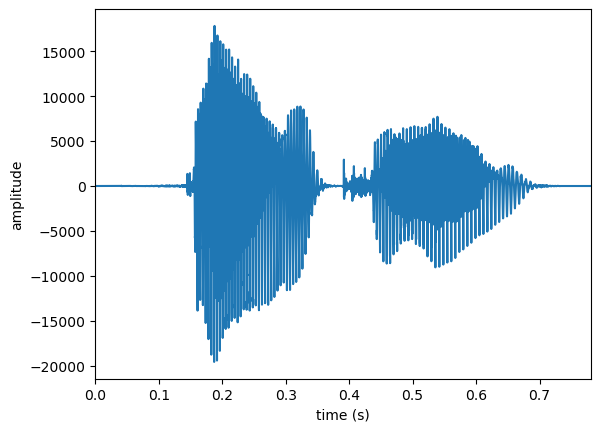

In [5]:
plt.plot(times, v_data)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [6]:
import os
from scipy.io.wavfile import write

In [7]:
Fs = 44100.0

tlen = 1
Ts = 1 / Fs
t = np.arange(0, tlen, Ts)

In [8]:
sin_freq = 440
src = 2*np.pi*sin_freq*t

signal = np.sin(src)

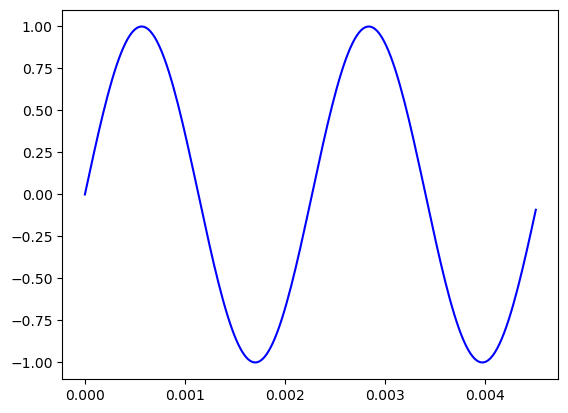

In [12]:
x_range = 200
plt.plot(t[0:x_range], signal[0:x_range], color = 'blue')

plt.show()

In [13]:
freq = np.fft.fftfreq(len(t), Ts)
signal_f = np.fft.fft(signal)

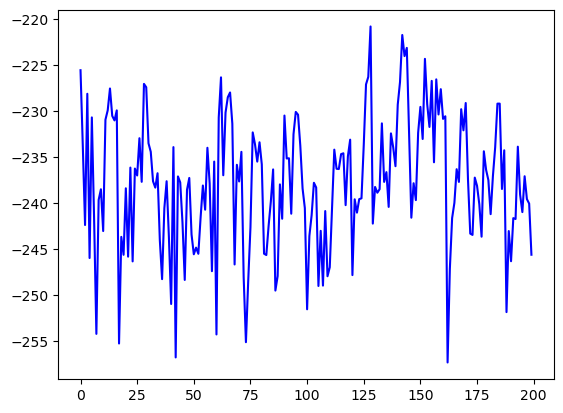

In [14]:
plt.plot(freq[0:x_range], 20*np.log10(np.abs(signal_f[0:x_range])), color='blue')

plt.show()

In [15]:
scaled = np.int16(signal/np.max(np.abs(signal))*32767)
write('snd_siganl.wav', 44100, scaled)

In [50]:
noise = np.random.uniform(-1,1,len(t))
scaled_noise = noise*0.3

print('noise[0:20] = ')
print(noise[0:20])
print('scaled_noise[0:20] = ')
print(scaled_noise[0:20])

noise[0:20] = 
[-0.51710465 -0.28471767  0.4769076  -0.99752487 -0.80756023 -0.38043655
  0.10015338 -0.87912776  0.61081573  0.62382557  0.74020052 -0.95272761
  0.317422   -0.86577966  0.60196086 -0.12598738 -0.44111502  0.02608858
 -0.47549883 -0.9950284 ]
scaled_noise[0:20] = 
[-0.1551314  -0.0854153   0.14307228 -0.29925746 -0.24226807 -0.11413097
  0.03004601 -0.26373833  0.18324472  0.18714767  0.22206015 -0.28581828
  0.0952266  -0.2597339   0.18058826 -0.03779621 -0.13233451  0.00782657
 -0.14264965 -0.29850852]


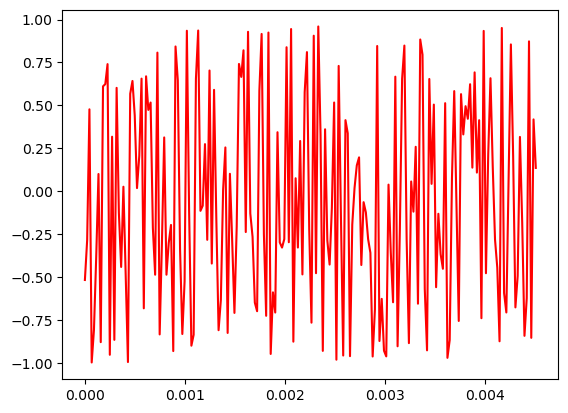

In [51]:
plt.plot(t[0:x_range], noise[0:x_range], color='red')
plt.show()

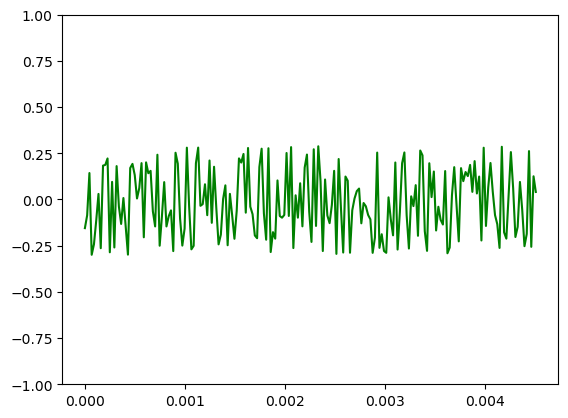

In [52]:
plt.plot(t[0:x_range], scaled_noise[0:x_range], color='green')
plt.ylim(-1,1)
plt.show()

In [53]:
scaled = np.int16(noise/np.max(np.abs(noise))*32767)
write('noise_signal.wav', 44100, scaled)

In [54]:
signal_n = signal + noise

scaled_noise = noise*0.3
signal_n = signal + scaled_noise

In [49]:
scaled = np.int16(signal_n / np.max(np.abs(signal_n)) * 32767)
write('snd_noise.wav', 44100, scaled)

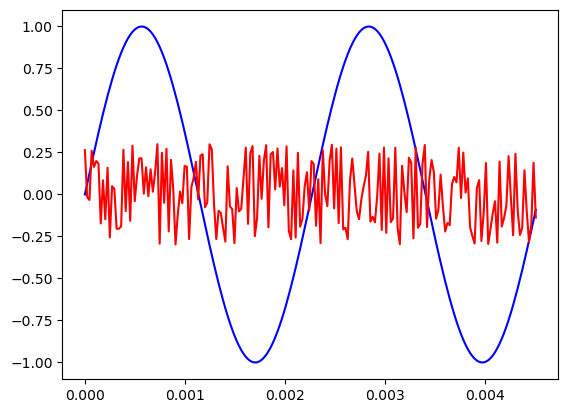

In [23]:
plt.plot(t[0:x_range], signal[0:x_range], color = 'blue')
plt.plot(t[0:x_range], scaled_noise[0:x_range], color='red')
plt.show()

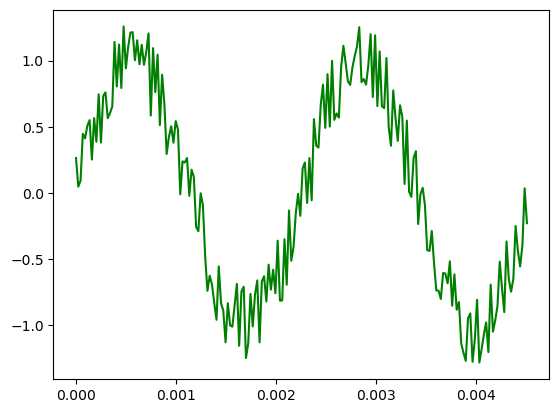

In [24]:
plt.plot(t[0:x_range], signal_n[0:x_range], color='green')
plt.show()

In [38]:
os.system('open snd_signal.wav')
os.system('open noise_signal.wav')
os.system('open snd_noise.wav')

0

In [39]:
import scipy.io as sio

In [40]:
v_samplerate, v_data = sio.wavfile.read('thank_you.wav')
b_samplerate, b_data = sio.wavfile.read('Invisible_Beauty.wav')

In [41]:
v_times = np.arange(len(v_data)) / float(v_samplerate)
b_times = np.arange(len(b_data)) / float(b_samplerate)

In [42]:
print('sampling rate : ', v_samplerate, b_samplerate)
print('time : ', v_times[-1], b_times[-1])
print('len : ', len(v_data), len(b_data))

sampling rate :  22050 44100
time :  0.7813605442176871 187.1887074829932
len :  17230 8255023


In [44]:
print(v_data.shape)
print(b_data.shape)

(17230,)
(8255023, 2)


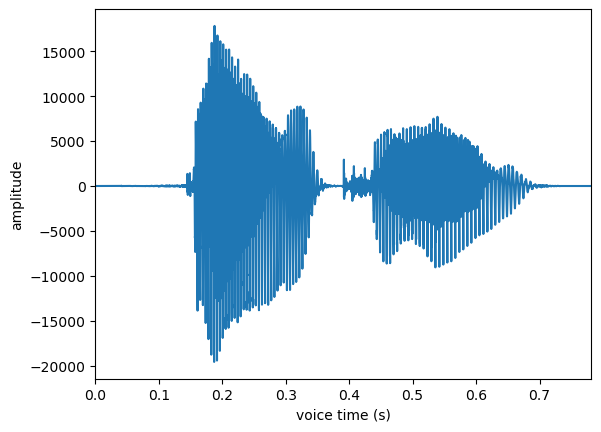

In [45]:
plt.plot(v_times, v_data)
plt.xlim(v_times[0], v_times[-1])
plt.xlabel('voice time (s)')
plt.ylabel('amplitude')
plt.show()

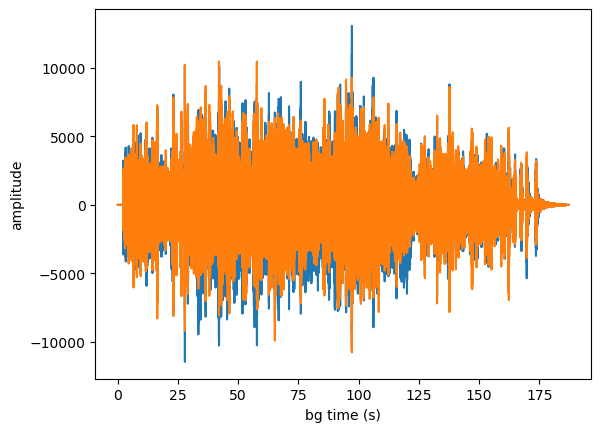

In [46]:
plt.plot(b_times, b_data)
plt.xlabel('bg time (s)')
plt.ylabel('amplitude')
plt.show()

In [55]:
if(len(v_data.shape) > 1) :
    v_data = np.array(v_data[:, 0])
if(len(b_data.shape) > 1) :
    b_data = np.array(b_data[:, 0])

In [56]:
if(v_samplerate > b_samplerate) :
    diffRate = int(v_samplerate / b_samplerate)
    v_data = np.array(v_data[0:len(v_data):diffRate])
    sr = b_samplerate
elif(v_samplerate < b_samplerate) :
    diffRate = int(b_samplerate / v_samplerate)
    b_data = np.array(b_data[0:len(b_data):diffRate])
    sr = v_samplerate
else :
    sr = b_samplerate

In [57]:
mix_data = v_data + b_data[sr*10 : len(v_data) + sr*10]

b_data[sr*10 : len(v_data)+sr*10] = mix_data

In [59]:
scaled = np.int16(b_data / np.max(np.abs(b_data)) * 32767)
write('music_card.wav', sr, scaled)
os.system('open music_card.wav')

0